# 1.*Import Libraries*

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")

# 2.*Load Dataset*

In [42]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3.*Summary Statistics*

In [44]:
df.shape

(891, 12)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 4.*Visualizing Numeric Features*

### A. *Histogams*

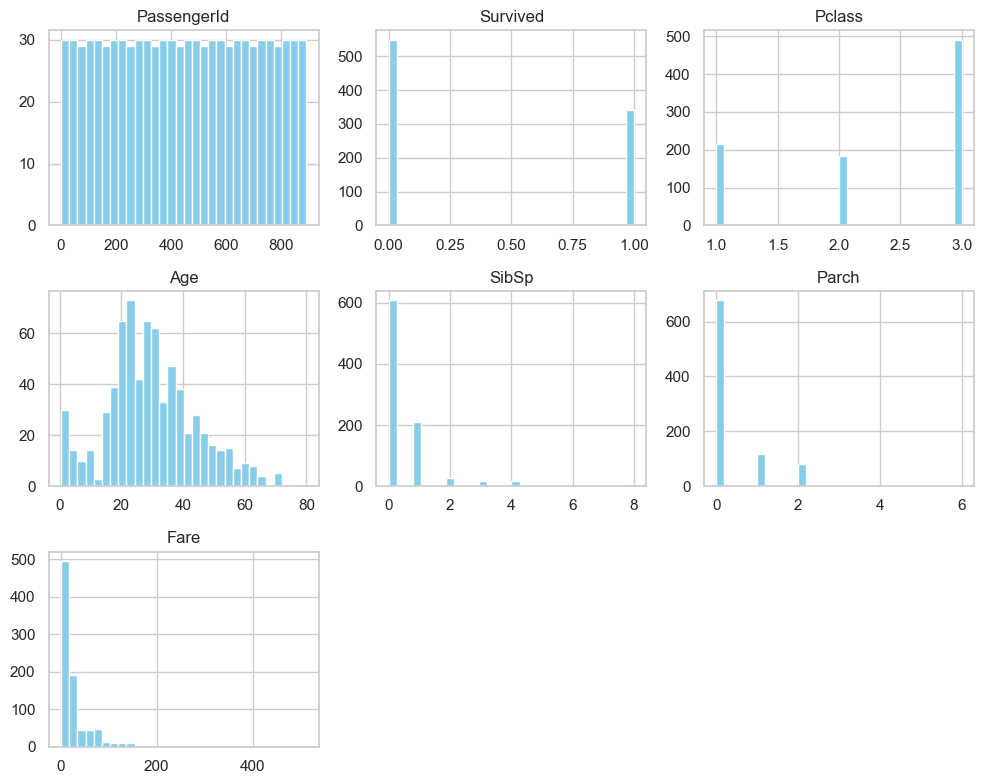

In [50]:
df.hist(figsize=(10,8), bins=30, color='skyblue')
plt.tight_layout()
plt.show()

### B. *Boxplots*

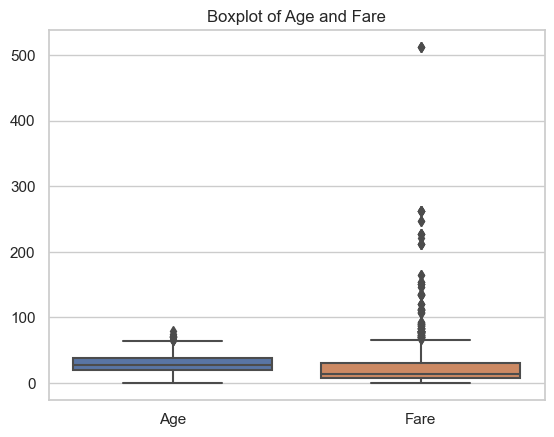

In [52]:
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplot of Age and Fare')
plt.show()

# 5.*Feature Relationships*

### A. *Pairplot*

C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



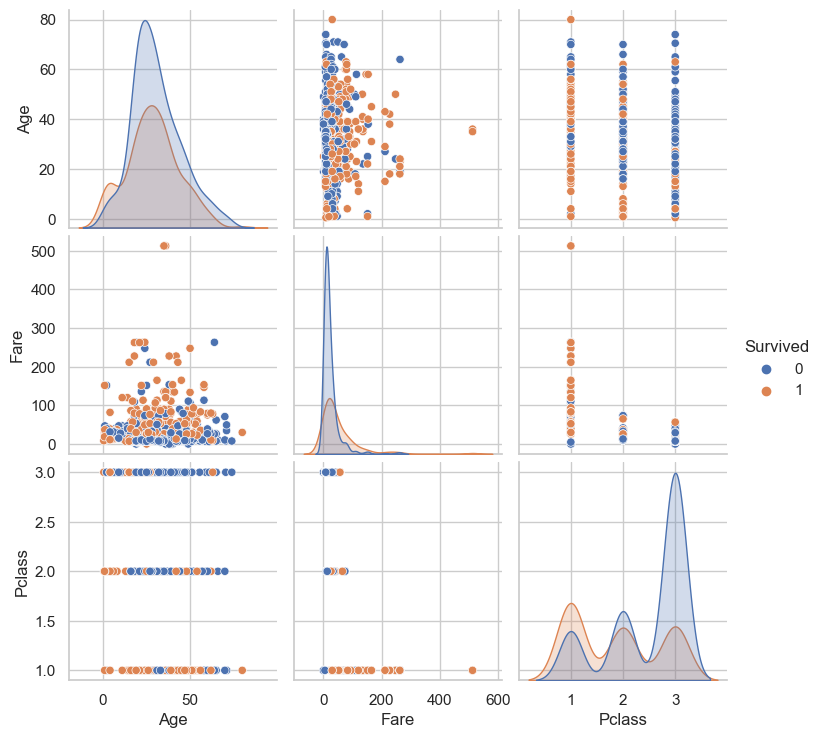

In [95]:
sns.pairplot(df[['Age', 'Fare', 'Survived', 'Pclass']].dropna(), hue='Survived')
plt.show()

### B. *Correlation Matrix*

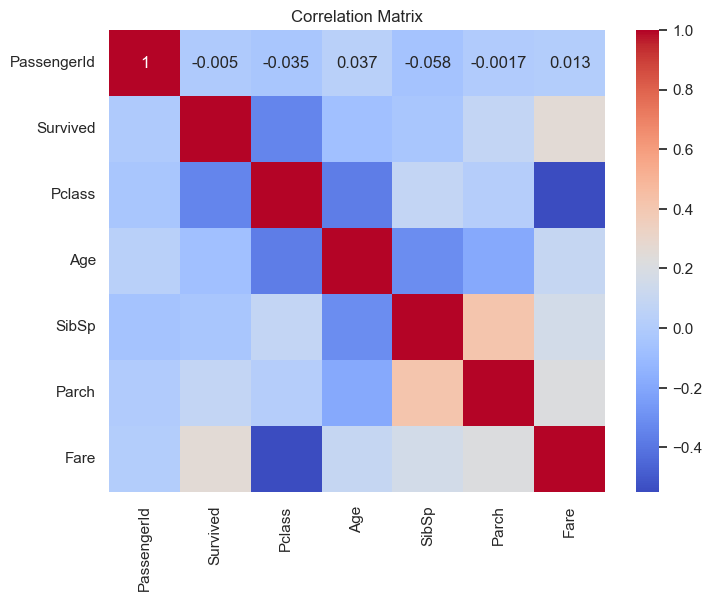

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 6.*Interactive Visuals*

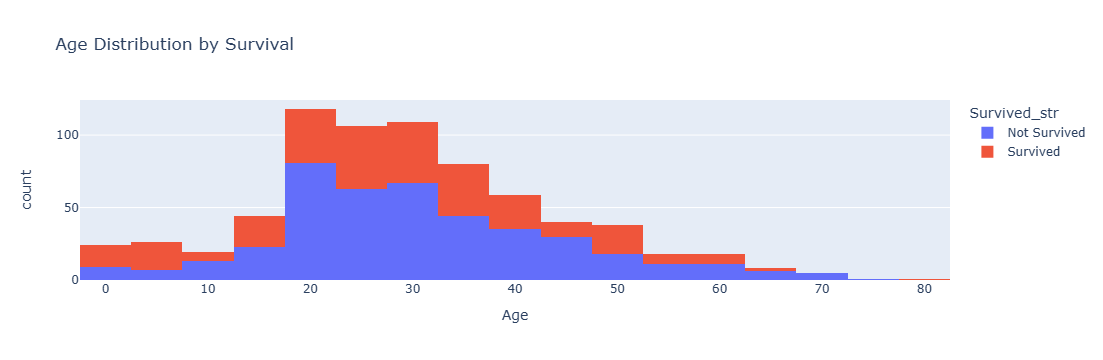

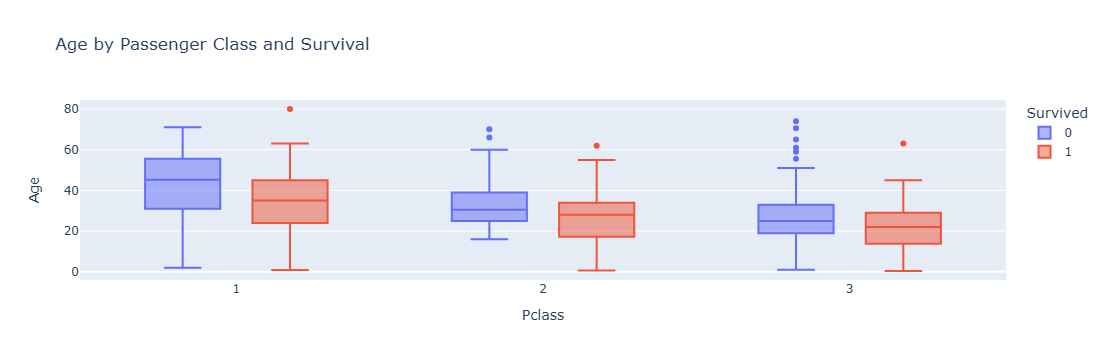

In [100]:
df['Survived_str'] = df['Survived'].map({0: 'Not Survived', 1: 'Survived'})
fig = px.histogram(df, x='Age', color='Survived_str', nbins=30,
                   title="Age Distribution by Survival")
fig.show()

fig = px.box(df, x='Pclass', y='Age', color='Survived', title="Age by Passenger Class and Survival")
fig.show()

# 7.*Observations and Inference*

-Survival rate higher in 1st class

-Younger passengers had higher survival

-More males onboard but females survived more

-Many missing ages — consider imputation

-Outliers exists in fare and age(based on boxplots)

# 8.*Save Charts*

In [ ]:
plt.savefig('age_histogram.png')

# 9.*Final Summary*

In [ ]:
- Passengers in 1st class had better survival chances.
- Female passengers had higher survival than males.
- Young children had higher survival than adults.
- Outliers exist in Fare and Age.
- Missing data in Age — suggest imputation before modeling